## Airline Tweets: Sentiment Analysis & Simple Classification

### ISM6564

**Week04, Part02**

&copy; 2023 Dr. Tim Smith

<a target="_blank" href="https://colab.research.google.com/github/prof-tcsmith/ta-f23/blob/main/W04/4.3-Tutorial - Descriptive Analysis - brand sentiment.ipynb#offline=1">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

---

## Introduction

In this notebook we will analysze the sentiment from a dataset on how travelers tweeted about their airline-related feelings, scraped from Twitter in February 2015;.

In [2]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from matplotlib import pyplot as plt

from nltk.tokenize import TweetTokenizer

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from textblob import TextBlob
import seaborn as sns

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
# read in the data 
df = pd.read_csv('data/Tweets.csv') 
df.head()

,tweet_id,airline,name,retweet_count,text
0,5.703060e+17,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.
1,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...
2,5.703010e+17,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...
3,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...
4,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...


In [7]:
tokenizer = TweetTokenizer()

def clear_text(text):
    # tokenize the text
    # nltk.download('punkt') # uncomment if you need to download the punkt package
    tokens = tokenizer.tokenize(text)
    
    # remove all tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    
    # make lowercase
    tokens = [word.lower() for word in tokens]

    # remove all tokens that are only one character
    tokens = [word for word in tokens if len(word) > 1]

    return ' '.join(tokens)

df['clean_text']=df.text.apply(lambda x: clear_text(x))   
df['hashtags'] = df.text.apply(lambda text: re.findall(r"#(\w+)", text))
df['handles'] = df.text.apply(lambda text: re.findall(r"@(\w+)", text))

In [8]:
df.head(10)

,tweet_id,airline,name,retweet_count,text,clean_text,hashtags,handles
0,5.703060e+17,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,what said,[],"[VirginAmerica, dhepburn]"
1,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,plus added commercials to the experience tacky,[],[VirginAmerica]
2,5.703010e+17,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,today must mean need to take another trip,[],[VirginAmerica]
3,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,really aggressive to blast obnoxious entertain...,[],[VirginAmerica]
4,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,and really big bad thing about it,[],[VirginAmerica]
5,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,seriously would pay flight for seats that have...,[],[VirginAmerica]
6,5.703010e+17,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",yes nearly every time fly vx this ear worm won...,[],[VirginAmerica]
7,5.703000e+17,Virgin America,pilot,0,@VirginAmerica Really missed a prime opportuni...,really missed prime opportunity for men withou...,[],[VirginAmerica]
8,5.703000e+17,Virgin America,dhepburn,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",well but now do,[],[virginamerica]
9,5.702950e+17,Virgin America,YupitsTate,0,"@VirginAmerica it was amazing, and arrived an ...",it was amazing and arrived an hour early too g...,[],[VirginAmerica]


In [9]:
df = df.drop(columns=["tweet_id", "name", "retweet_count"]) # though we could use these columns for other analysis, for this analysis we will not

In [10]:
df.columns

Index(['airline', 'text', 'clean_text', 'hashtags', 'handles'], dtype='object')

In [25]:
df["airline"].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

### Sentiment analysis using TextBlob

In [26]:
analyzer = SentimentIntensityAnalyzer()

df['tb_polarity'] = df['clean_text'].apply(lambda x: TextBlob(x).polarity)
df['tb_sentiment'] = df['tb_polarity'].apply(lambda x: 'pos' if x >=0 else 'neg')

df.sample(n=20)

,airline,text,clean_text,hashtags,handles,tb_polarity,tb_sentiment
12542,American,@AmericanAir and btwn gate a8 &amp; a15 I lost...,and btwn gate lost diamond earring pls have ma...,[dayjustgotWORSE],[AmericanAir],0.000000,pos
9992,US Airways,@USAirways now after an hour on the plane and ...,now after an hour on the plane and knowing of ...,[],[USAirways],0.000000,pos
13235,American,@AmericanAir Retrain in Customer Service first...,retrain in customer service first make proper ...,[],[AmericanAir],0.283333,pos
7826,Delta,@JetBlue where did my travel bank credit go? ...,where did my travel bank credit go call you ri...,[],[JetBlue],0.285714,pos
11244,US Airways,@USAirways you're the only airline that's not ...,the only airline not open sooner not confidenc...,[],[USAirways],0.000000,pos
7583,Delta,@JetBlue That's not what I heard. Weather was ...,not what heard weather was fine this morning f...,[],[JetBlue],0.391667,pos
7133,Delta,“@JetBlue: Our fleet's on fleek. http://t.co/J...,our on fleek jet blizzue in the hizouse,[],[JetBlue],0.000000,pos
11157,US Airways,"“@USAirways: Reminder: From 2/28, we’ll be twe...",reminder from we ll be tweeting from you shoul...,[],"[USAirways, AmericanAir]",0.000000,pos
976,United,@united first time flying with United. Also la...,first time flying with united also last time b...,"[terrible, branson, virginatlantic, UnitedAirl...","[united, VirginAtlantic]",0.083333,pos
2321,United,"@united cabin crew were huge offenders, stood ...",cabin crew were huge offenders stood as conver...,[],[united],0.400000,pos


In [27]:
df.loc[df.tb_polarity >= 0.85 , ["tb_polarity", "airline", "text"]].sample(20).values

array([[1.0, 'Delta', '@JetBlue awesome'],
       [0.89, 'American',
        "@AmericanAir Agents in DFW were very kind did their best to help, but this doesn't make up for PHX error and attitude! #Americant"],
       [1.0, 'United',
        '@united I do I was on UA 495 LAX TO DEN - we are scheduled to land LAX @ 7:38 am - please rebook to Denver - best flight'],
       [1.0, 'Virgin America',
        '@VirginAmerica husband and I ordered three drinks via my screen and they never came. Awesome!'],
       [1.0, 'American',
        "@americanair the best is your 800 message saying to use website and your website is saying you need to call.  If you don't answer, #hardtodo"],
       [1.0, 'Southwest',
        '@SouthwestAir @JasonWhitely flt 947 Emer stop in Albuquer for a heart condition, crew was awesome, pilot was Maverick on the divert.'],
       [1.0, 'Virgin America',
        '@VirginAmerica called your service line and was hung up on. This is awesome. #sarcasm'],
       [1.0, 'US A

In [28]:
df.loc[df.tb_polarity >= -0.85 , ["tb_polarity", "airline", "text"]].sample(20).values

array([[0.029365079365079344, 'US Airways',
        '@USAirways if a passenger is to large to put down the armrest and now is using part of my seat, what is my recourse?  #nothappy'],
       [0.05, 'United',
        "@united terminal at MIA should have food open before 5am esp when there are flights at 6am. Two hours early like recommended. Can't eat."],
       [0.1, 'Southwest',
        '@SouthwestAir sent. looking for that functionality in your app, though. should be a one click action.'],
       [0.0, 'US Airways', '@USAirways it takes a month?'],
       [0.0, 'United',
        '@united 4 open seats in 1st class on UA 2065. Way to honor your upgrade policy for freq flyers and/or honor an employee with an upgrade.'],
       [0.2857142857142857, 'United',
        '.@united Our newest delay, right now http://t.co/96fTLZWtvO'],
       [-0.008333333333333331, 'United',
        "@united wont transfer flight ticket to accompany an 11 yr old who's active military mom had to have emergency b

### Sentiment analysis using NLTK

In [29]:
analyzer = SentimentIntensityAnalyzer()

df['nltk_polarity'] = df['clean_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['nltk_sentiment'] = df['nltk_polarity'].apply(lambda x: 'pos' if x >=0 else 'neg')

df.sample(n=20)

,airline,text,clean_text,hashtags,handles,tb_polarity,tb_sentiment,nltk_polarity,nltk_sentiment
4483,Southwest,@SouthwestAir can you tell me why you Cancelle...,can you tell me why you cancelled flightled th...,[],[SouthwestAir],0.000000,pos,-0.5106,neg
12163,American,Just got off the phone @AmericanAir customer s...,just got off the phone customer service only m...,[],[AmericanAir],0.500000,pos,0.6249,pos
6501,Southwest,@SouthwestAir can you make a premium wifi that...,can you make premium wifi that can pay for tha...,[slow],[SouthwestAir],0.166667,pos,-0.1027,neg
12228,American,@AmericanAir um. down south has snow too #ATL,um down south has snow too,[ATL],[AmericanAir],-0.155556,neg,0.0000,pos
11059,US Airways,@UsAirways your person taking tickets is rude...,your person taking tickets is rude and now we ...,[500],[UsAirways],-0.300000,neg,-0.5994,neg
8823,Delta,"@JetBlue flight 894, first officer not even at...",flight first officer not even at the airport w...,[],[JetBlue],0.175000,pos,0.4404,pos
7750,Delta,@JetBlue lipstick on a pig still a pig. Ur new...,lipstick on pig still pig ur new baggage claim...,[fail],[JetBlue],0.136364,pos,-0.7430,neg
9096,US Airways,@USAirways oh I got right through to an agent....,oh got right through to an agent they just kep...,[],[USAirways],0.285714,pos,-0.4019,neg
5073,Southwest,@SouthwestAir been on hold for 1.5 hrs. What's...,been on hold for hrs up,[],[SouthwestAir],0.000000,pos,0.0000,pos
5260,Southwest,@SouthwestAir no. Told to call cust service on...,no told to call cust service on monday,[],[SouthwestAir],0.000000,pos,-0.2960,neg


In [30]:
df.loc[df.nltk_polarity > .85 , ["nltk_polarity", "airline", "text"]].sample(20).values

array([[0.8885, 'Virgin America',
        "@VirginAmerica gave a credit for my Late Flight flight yesterday. Great service !!!! That's a Wow moment! Unexpected gesture!"],
       [0.8993, 'United',
        "@united If you'd love to see more girls be inspired about becoming pilots, RT our free WOAW event March 2-8 at ABQ. http://t.co/rfXlV1kGDh"],
       [0.9001, 'Delta',
        '“@JetBlue: @2littlebirds Well captured, Brittany! We love the clouds! :)  Enjoy the ride!” Thank you!'],
       [0.9143, 'Southwest',
        '@SouthwestAir Travel agent Darrel here at Love Field hosting a paper airplane contest to entertain all the children was so awesome to see!'],
       [0.9169, 'Delta',
        '@JetBlue I just wanted to say flight attendant fitz was the best tonight on flight #1326 bwi/Bos. Great guy and made the flight fantastic!'],
       [0.91, 'Delta',
        '@JetBlue OH YEAH!!! great flight down to Mexico with a wonderful crew!! Thank you!!'],
       [0.8689, 'American',
        '

In [31]:
df.loc[df.nltk_polarity < -0.85 , ["nltk_polarity", "airline", "text"]].sample(20).values

array([[-0.9469, 'American',
        "@AmericanAir but seriously if my cats dead I'm going to be pissed/very thankful because it is evil and wants my soul"],
       [-0.9217, 'United',
        '@united Once again I am victim to the scam that is your SHIT Customer Service, this time the agent hung up on me WTF do you teach your staff'],
       [-0.8705, 'Southwest',
        '@SouthwestAir#4569 Cancelled Flightled, had to get refund. Cancelled Flightlations happen. But the 25+ min phone wait &amp; painful music unacceptable. Come on...'],
       [-0.8519, 'United',
        '@united I tried but no one was available in bogota and everyone was rude in Houston. I was stuck for 35 hours because of you guys'],
       [-0.9246, 'American',
        '@AmericanAir Miami-PhL flight Cancelled Flightled just as I got to the gate. No one from AA around, no one on the phone. Awful awful awful.'],
       [-0.894, 'United',
        '@united, last week shanghai to sfo 858 delay 5hrs bc of engine. today sf

## How correlated are the polarity scores between TextBlob and NTLK?

In [32]:
import numpy as np
print(np.corrcoef(df.tb_polarity, df.nltk_polarity))      # Correlation

[[1.        0.5602282]
 [0.5602282 1.       ]]


In [33]:
# Question: Which sentiment analysis is more accurate: NLTK or Textblob?
# Try sentiment analysis using other packages such as Gensim (https://radimrehurek.com/gensim/)

### Data visualizations using seaborn

In [34]:
airlines_of_interest = ["United", "Southwest", "American"]
#data = df[df.tb_polarity != 0]
data = df[(df.tb_polarity < -0.1) | (df.tb_polarity > 0.1)]
data = data.loc[df.airline.isin(airlines_of_interest)]

print("United", df.airline[df.airline == 'United'].count())
print("Southwst", df.airline[df.airline == 'Southwest'].count())
print("American", df.airline[df.airline == 'American'].count())

United 3822
Southwst 2420
American 2759


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


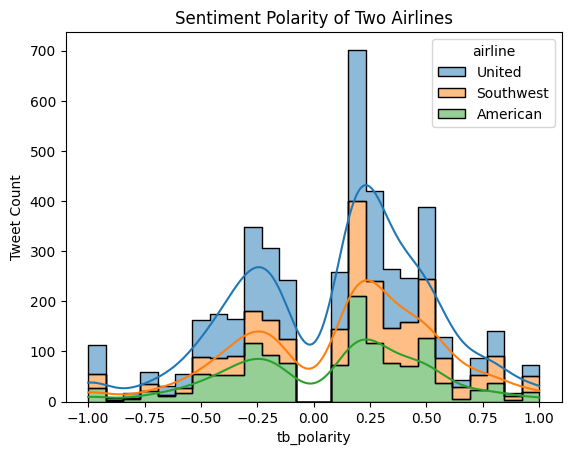

In [35]:
fig, ax = plt.subplots()
ax.legend().set_title("SOMETHING")

#sns.kdeplot(data=data, x="polarity", hue="airline", multiple="stack")

#sns.histplot(data=data, x="tb_polarity", hue="airline", multiple="stack", kde=True)
#sns.histplot(data=data, x="tb_polarity", hue="airline", multiple="stack", element='step', kde=True)
#sns.histplot(data=data, x="tb_polarity", hue="airline", multiple="stack", element='step', stat="density", common_norm=False, cumulative=True, kde=True)
sns.histplot(data=data, x="tb_polarity", hue="airline", multiple="stack", element='step', kde=True)
#sns.histplot(data=data, x="tb_polarity", hue="airline", multiple="stack", element='poly', kde=True)
#sns.histplot(data=data, x="tb_polarity", hue="airline", multiple="fill", kde=True)
#sns.histplot(data=data, x="tb_polarity", hue="airline", multiple="layer", kde=True)

#sns.histplot(data=data, x="tb_polarity", hue="airline", multiple="dodge", kde=True)


plt.title("Sentiment Polarity of Two Airlines")
plt.ylabel("Tweet Count")
plt.show()

In [36]:
# You can also check out the Plot.ly graphics library - it has the ability to add sliders, and other interactive elements, to your charts